In [1]:
import matplotlib.pyplot as plt
import sys

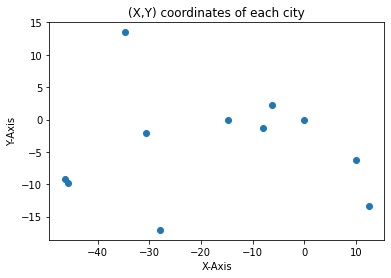

In [2]:
##list of cities and corresponding coordinates
cities = ["Ape", "Big", "Cow", "Dog", "Egg", "Fox", "Gas", "Hit", "Ick", "Jab", "Kim"]
xyCoord = [(-0.307996E-04, -0.186857E-04), (-14.8058, -0.373991E-04), (-45.6755, -9.74380), 
           (-30.6703, -2.02336), (12.5209, -13.3649), (-46.3966, -9.17876), (-34.7018, 13.4900), (-6.15704, 2.20589),
          (-8.02244, -1.35290), (-27.9627, -17.0577), (9.95119, -6.27887)]
plt.scatter(*zip(*xyCoord))
plt.title('(X,Y) coordinates of each city')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.show()

In [3]:
# Dijkstra's single source shortest path algorithm for adjacency matrix representation of the graph

class Graph():
  
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)] 
                    for row in range(vertices)]
  
    def printSolution(self, dist):
        print("Vertex \tDistance from Source")
        for node in range(self.V):
            print(node, ": ", cities[node], "\t", dist[node])
  
    # A utility function to find the vertex with 
    # minimum distance value, from the set of vertices 
    # not yet included in shortest path tree
    def minDistance(self, dist, sptSet):
  
        # Initilaize minimum distance for next node
        min = sys.maxsize
  
        # Search not nearest vertex not in the 
        # shortest path tree
        for v in range(self.V):
            if dist[v] < min and sptSet[v] == False:
                min = dist[v]
                min_index = v
  
        return min_index
  
    # Funtion that implements Dijkstra's single source 
    # shortest path algorithm for a graph represented 
    # using adjacency matrix representation
    def dijkstra(self, src):
  
        dist = [sys.maxsize] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
  
        for cout in range(self.V):
  
            # Pick the minimum distance vertex from 
            # the set of vertices not yet processed. 
            # u is always equal to src in first iteration
            u = self.minDistance(dist, sptSet)
            # Put the minimum distance vertex in the 
            # shotest path tree
            sptSet[u] = True
  
            # Update dist value of the adjacent vertices 
            # of the picked vertex only if the current 
            # distance is greater than new distance and
            # the vertex in not in the shotest path tree
            for v in range(self.V):
                if self.graph[u][v] > 0 and sptSet[v] == False and \
                dist[v] > dist[u] + self.graph[u][v]:
                        dist[v] = dist[u] + self.graph[u][v]
                        #print(cities[v])
  
        self.printSolution(dist)

In [8]:
distanceMatrixGraph = Graph(10)

In [5]:
distanceMatrixGraph.graph = [[0,8,50,31,12,48,36,2,5,39,10],
        [8,0,38,9,33,37,22,6,4,14,32],
        [50,38,0,11,55,1,23,46,41,17,52],
        [31,9,11,0,44,13,16,19,25,18,42],
        [12,33,55,44,0,54,53,30,28,45,7],
        [48,37,1,13,54,0,26,47,40,24,51],
        [36,22,23,16,53,26,0,29,35,34,49],
        [2,6,46,19,30,47,29,0,3,27,15],
        [5,4,41,25,28,40,35,3,0,20,21],
        [39,14,17,18,45,24,34,27,20,0,43],
        [10,32,52,42,7,51,49,15,21,43,0]
        ]

In [6]:
sourceNode = 0
print("distance from source", cities[sourceNode])
distanceMatrixGraph.dijkstra(0); # distance from source

distance from source Ape
Vertex 	Distance from Source
0 :  Ape 	 0
1 :  Big 	 8
2 :  Cow 	 28
3 :  Dog 	 17
4 :  Egg 	 12
5 :  Fox 	 29
6 :  Gas 	 30
7 :  Hit 	 2
8 :  Ick 	 5
9 :  Jab 	 22
